# Clase 20: Diseño Experimental VI



# Diseño Factorial Completamente Aleatorizado (CRFD): Caso $2^k$

Para abrir en Google Colab: <a target="_blank" href="https://githubtocolab.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/Clases/Clases/Clase20_DisenoExperimentalVI.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Caso de Estudio: Planta Química

In [ ]:
# set de datos
import itertools as it
y = [45, 41, 90, 67, 50, 39, 95, 66, 47, 43, 95, 69, 40, 51, 87, 72]

A_chem, B_chem, C_chem, D_chem = [],[],[],[]
for row in it.product([-1,1], repeat = 4):
    A_chem.append(row[3])
    B_chem.append(row[2])
    C_chem.append(row[1])
    D_chem.append(row[0])

df_chem = pd.DataFrame()
df_chem['A_chem'] = A_chem
df_chem['B_chem'] = B_chem
df_chem['C_chem'] = C_chem
df_chem['D_chem'] = D_chem
df_chem['response'] = y
df_chem


,A_chem,B_chem,C_chem,D_chem,response
0,-1,-1,-1,-1,45
1,1,-1,-1,-1,41
2,-1,1,-1,-1,90
3,1,1,-1,-1,67
4,-1,-1,1,-1,50
5,1,-1,1,-1,39
6,-1,1,1,-1,95
7,1,1,1,-1,66
8,-1,-1,-1,1,47
9,1,-1,-1,1,43


In [ ]:

# linear model

model_chem = ols('response ~ (A_chem)*(B_chem)*(C_chem)*(D_chem)', data=df_chem).fit()
print(model_chem.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 24 May 2025   Prob (F-statistic):                nan
Time:                        22:31:06   Log-Likelihood:                 471.37
No. Observations:                  16   AIC:                            -910.7
Df Residuals:                       0   BIC:                            -898.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


In [ ]:
model_chem.params

,0
Intercept,62.3125
A_chem,-6.3125
B_chem,17.8125
A_chem:B_chem,-5.3125
C_chem,0.1875
A_chem:C_chem,0.8125
B_chem:C_chem,-0.3125
A_chem:B_chem:C_chem,-0.1875
D_chem,0.6875
A_chem:D_chem,2.0625


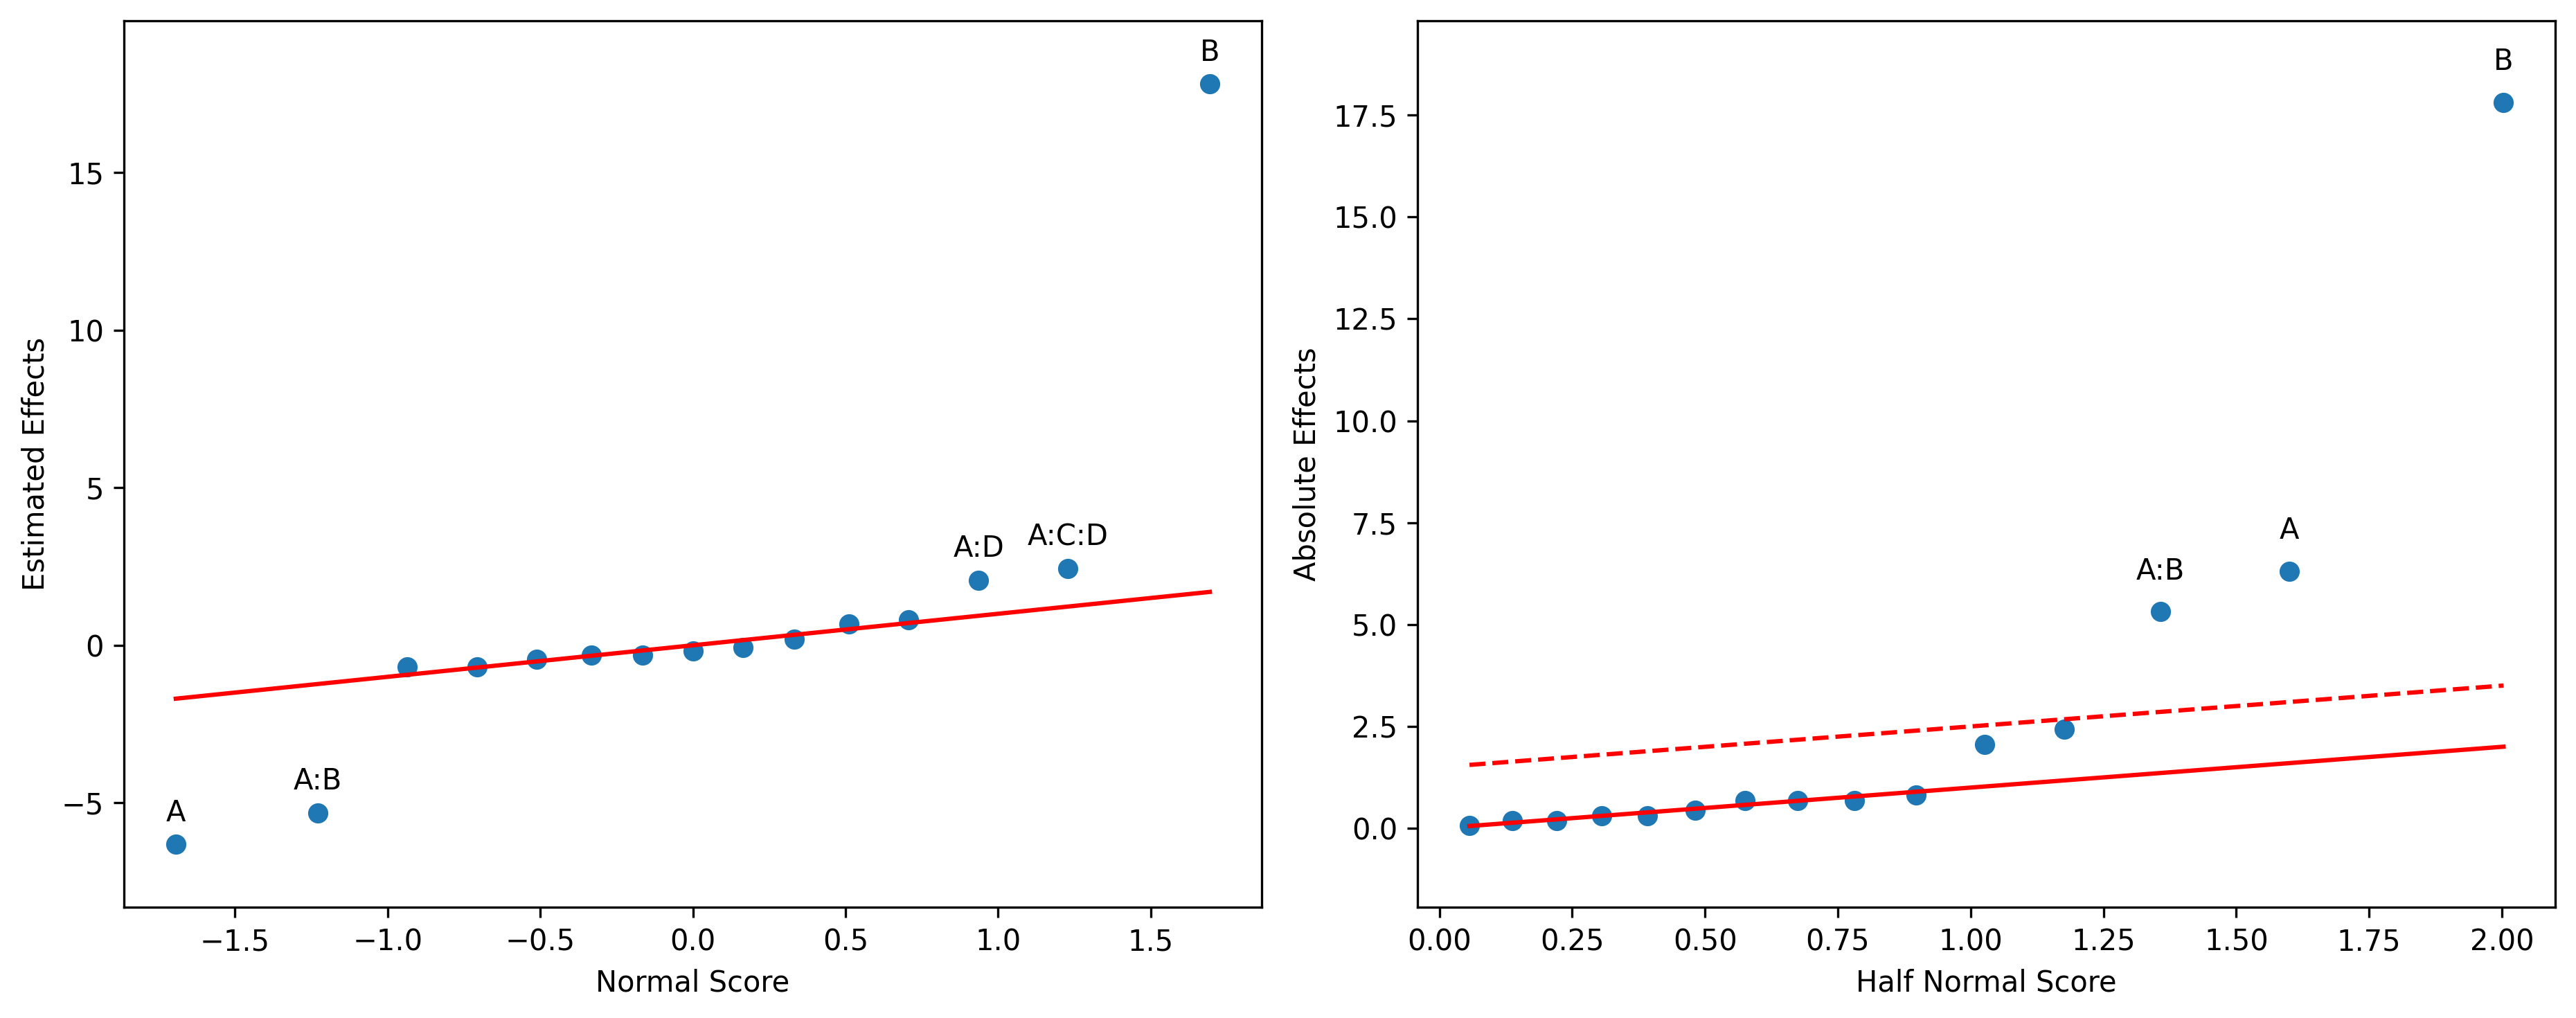

In [ ]:
import statsmodels.api as sm
import scipy.stats as st
fig, ax = plt.subplots(1,2, figsize = (12.5,5), dpi = 300)
# drop intercept
parameters = model_chem.params[1:].copy()
(osm, osr), (slope, intercept, r) = st.probplot(parameters, fit=True)
ax[0].scatter(osm, osr)
ax[0].plot(osm, osm, color = 'red')
ax[0].set_xlabel('Normal Score')
ax[0].set_ylabel('Estimated Effects')
labels = parameters.sort_values(ascending = True).index

for label, x, y in zip(labels, osm, osr):
    label = label.replace('_chem', '')
    signif = np.abs(y - x) > 0.5
    if signif:
        ax[0].text(
            x=x,
            y=y + 1,
            s=label,
            color='black',
            ha='center',
            va='center'
        )
ax[0].set_ylim(np.min(osr)-2, np.max(osr)+2)

### Obsolute

parameters = np.abs(model_chem.params[1:])
(osm, osr), (slope, intercept, r) = st.probplot(parameters, fit=True,
                                                dist = 'halfnorm')
ax[1].scatter(osm, osr)
ax[1].plot(osm, osm, color = 'red')
ax[1].set_xlabel('Half Normal Score')
ax[1].set_ylabel('Absolute Effects')
labels = parameters.sort_values(ascending = True).index
ax[1].plot(osm, osm+1.5, color = 'red', linestyle = '--')


for label, x, y in zip(labels, osm, osr):
    label = label.replace('_chem', '')
    signif = np.abs(y - x) > 1.5
    if signif:
        ax[1].text(
            x=x,
            y=y + 1,
            s=label,
            color='black',
            ha='center',
            va='center'
        )
ax[1].set_ylim(np.min(osr)-2, np.max(osr)+2)
fig.tight_layout()
plt.show()

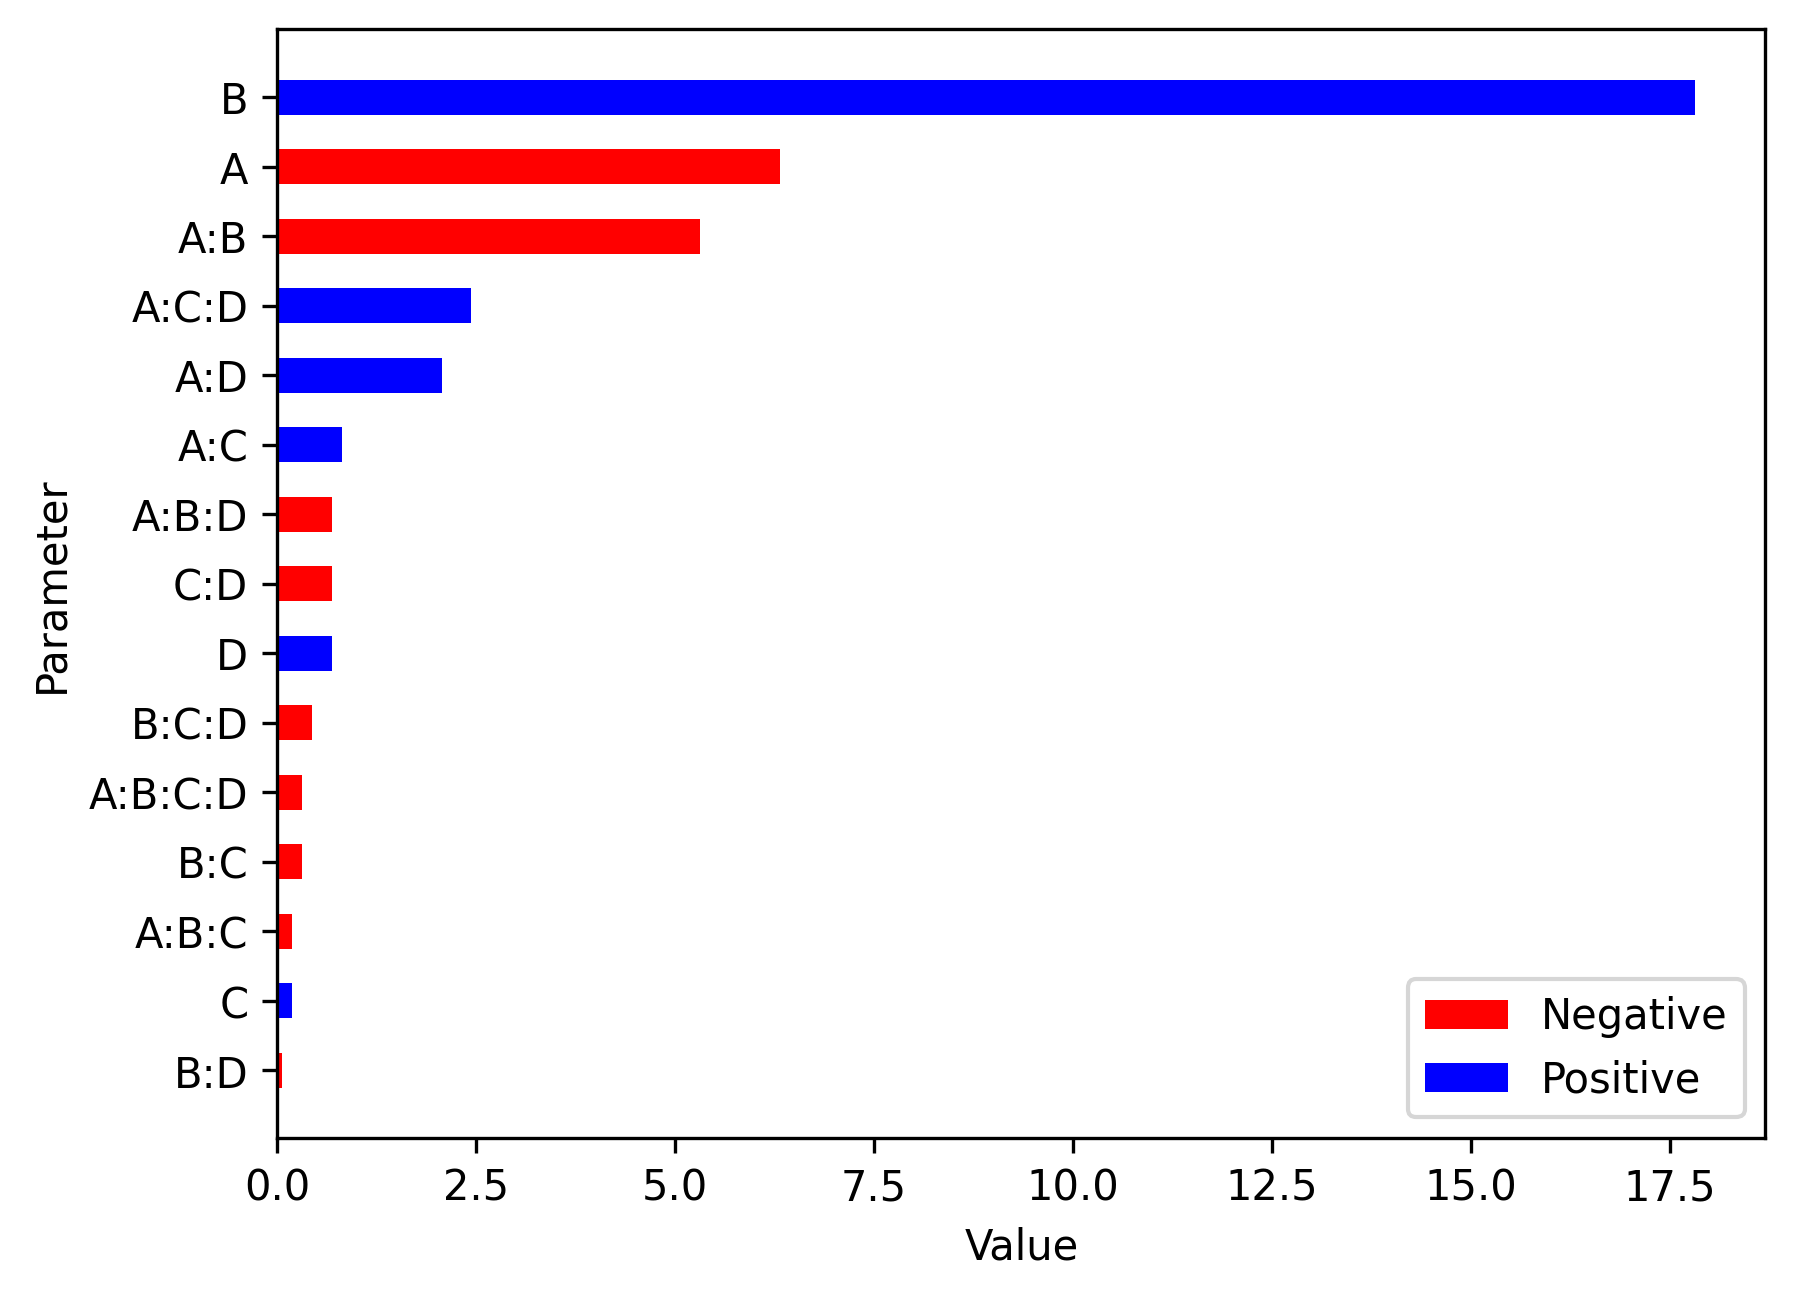

In [ ]:
# pareto plot
fig, ax = plt.subplots(dpi = 300)

params_model = model_chem.params.copy().rename('params').to_frame()
params_model['abs_params'] = abs(params_model['params'])
params_model.sort_values(by='abs_params', ascending = False, inplace = True)
neg, pos = ['red', 'blue']
label_neg = 0
label_pos = 0
for row in params_model.index[::-1]:
    name = row
    value = params_model.at[row, 'params']

    if name == 'Intercept':
        continue
    color = neg if value < 0 else pos
    if value > 0 and label_pos == 0 :
        label_pos += 1
        ax.barh(y = name.replace('_chem', ''), width = np.abs(value), height = 0.5, color = color , label = 'Positive')
    elif value < 0 and label_neg == 0:
        label_neg += 1
        ax.barh(y = name.replace('_chem', ''), width = np.abs(value), height = 0.5, color = color , label = 'Negative')
    else:
        ax.barh(y = name.replace('_chem', ''), width = np.abs(value), height = 0.5, color = color)

ax.legend(loc = 'lower right')
ax.set_xlabel('Value')
ax.set_ylabel('Parameter')
# set legend as the negative or positive value given by collor


plt.show()

In [ ]:
df_chem

,A_chem,B_chem,C_chem,D_chem,response
0,-1,-1,-1,-1,45
1,1,-1,-1,-1,41
2,-1,1,-1,-1,90
3,1,1,-1,-1,67
4,-1,-1,1,-1,50
5,1,-1,1,-1,39
6,-1,1,1,-1,95
7,1,1,1,-1,66
8,-1,-1,-1,1,47
9,1,-1,-1,1,43


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     121.0
Date:                Sat, 24 May 2025   Prob (F-statistic):           3.10e-09
Time:                        23:35:12   Log-Likelihood:                -43.057
No. Observations:                  16   AIC:                             94.11
Df Residuals:                      12   BIC:                             97.21
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        62.3125      1.030     60.489

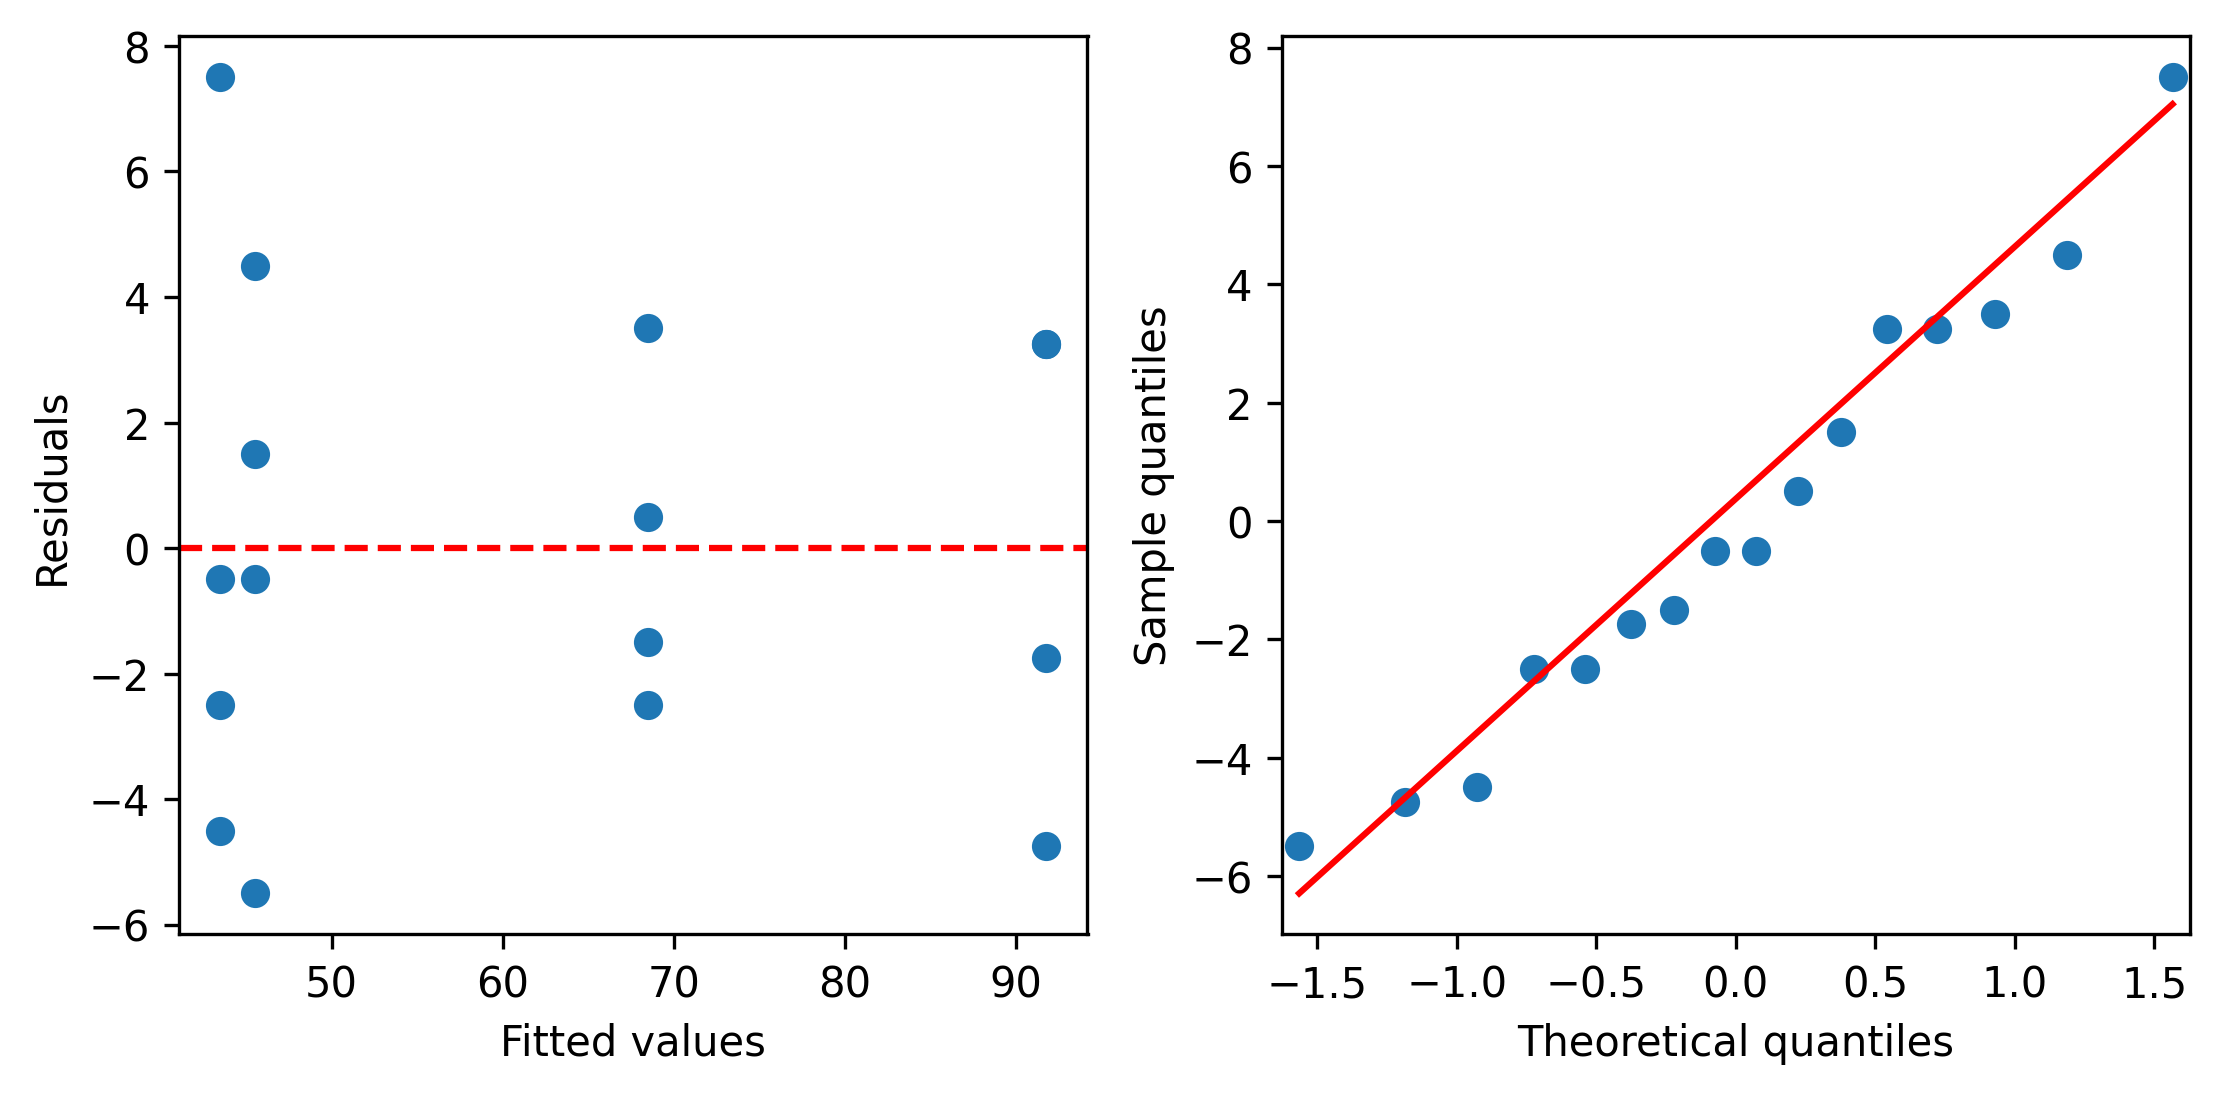

In [ ]:
# Modelo reducido

model_chem_red = ols('response ~ A_chem + B_chem + A_chem:B_chem', data=df_chem).fit()
print(model_chem_red.summary())

# Evaluación de residuos

fig, ax = plt.subplots(1,2, figsize = (7.5,7.5/2), dpi = 300)
ax[0].scatter(model_chem_red.fittedvalues, model_chem_red.resid)
ax[0].set_xlabel('Fitted values')
ax[0].set_ylabel('Residuals')
ax[0].axhline(y = 0, color = 'red', linestyle = '--')

sm.qqplot(model_chem_red.resid, line='q', ax = ax[1])
ax[1].set_xlabel('Theoretical quantiles')
ax[1].set_ylabel('Sample quantiles')

fig.tight_layout()
plt.show()




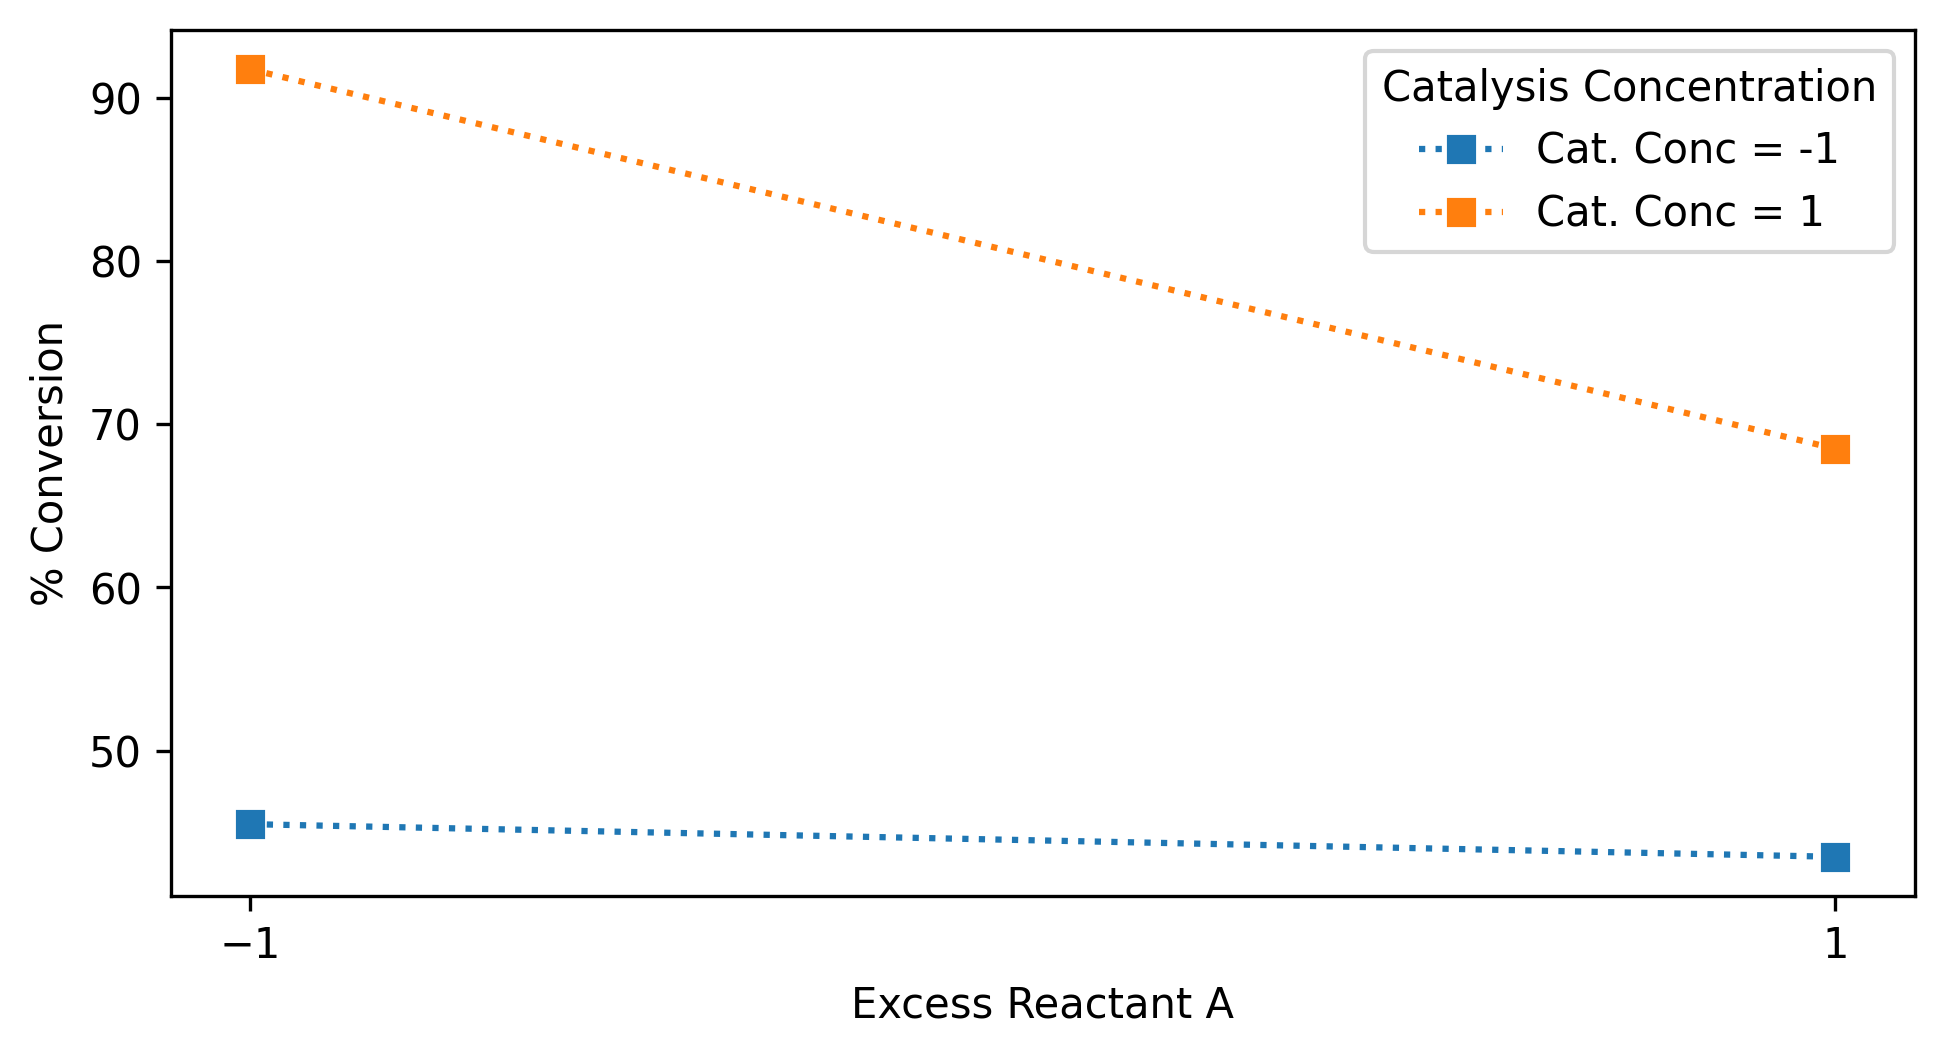

In [ ]:
# Recomendación
fig, ax = plt.subplots(dpi = 300, figsize = (7.5,7.5/2))
for B_c in df_chem['B_chem'].unique():
    B_response = df_chem[df_chem['B_chem'] == B_c]
    average_response_A = B_response.groupby('A_chem').mean()['response']
    ax.plot(average_response_A.index, average_response_A, linestyle = ':', label = f'Cat. Conc = {B_c}', marker = 's')
ax.set_xlabel('Excess Reactant A')
ax.set_ylabel('% Conversion')
ax.set_xticks([-1,1])
ax.legend(title = 'Catalysis Concentration')
plt.show()